In [1]:
# %%
from genericpath import isfile
import os
import sys
import shutil
import subprocess
import numpy as np
from datetime import datetime
from joblib import Parallel, delayed




EMDB_PDB_ids_training = ["0026_6gl7", "7573_6crv",  "0665_6oa9", "0038_6gml", "0071_6gve", "0093_6gyn", "0094_6gyo", "0132_6h3c", "0234_6hjn", "0408_6nbd", "0415_6nbq", "4288_6fo2", "0452_6nmi", "0490_6nr8", "0492_6nra", "0567_6o0h", "0589_6nmi", "0592_6o1m", "0776_6ku9", "10049_6rx4", "10069_6s01", "10100_6s5t", "10105_6s6t", "10106_6s6u", "10273_6sof", "10279_6sp2", "10324_6swe", "10333_6swy", "10418_6t9n", "10534_6tni", "10585_6ttu", "10595_6tut", "10617_6xt9", "20145_6oo4", "20146_6oo5", "20189_6osy", "20234_6p19", "20249_6p4h", "20254_6p5a", "20259_6p62", "20270_6p7v", "20271_6p7w", "20352_6pik", "20521_6pxm", "20986_6v0b", "21012_6v1i", "21107_6v8o", "21144_6vbu", "21391_6vv5", "3661_5no2", "3662_5no3", "3802_5of4", "3885_6el1", "3908_6eoj", "4032_5lc5", "4073_5lmn", "4074_5lmo", "4079_5lmt", "4148_5m3m", "4162_6ezo", "4192_6f6w", "4214_6fai", "4241_6fe8", "4272_6fki", "4401_6i2x", "4404_6i3m", "4429_6i84", "4588_6qm5", "4589_6qm6", "4593_6qma", "4728_6r5k", "4746_6r7x", "4759_6r8f", "4888_6ric", "4889_6rid", "4890_6rie", "4907_6rkd", "4917_6rla", "4918_6rlb", "4941_6rn3", "4983_6rqj", "7009_6ave", "7041_6b3q", "7065_6b7y", "7090_6bf6", "7334_6c23", "7335_6c24", "8911_6dt0", "8958_6e1n", "8960_6e1p", "9258_6muw", "9259_6mux", "9931_6k7g", "9934_6k7i", "9935_6k7j", "9939_6k7l", "9941_6k7m", "9695_6iok"]
EMDB_PDB_ids_validation = ["0193_6hcg", "0257_6hra", "0264_6hs7", "0499_6nsk", "10401_6t8h", "20449_6pqo", "20849_6uqk", "4611_6qp6", "4646_6qvb", "4733_6r69", "4789_6rb9", "7133_6bqv", "7882_6dg7", "8069_5i08", "9112_6mgv", "9298_6mzc", "9374_6nhv"]
EMDB_PDB_ids_epsilon = ["0282_6huo", "0311_6hz5", "0560_6nzu", "10365_6t23", "20220_6oxl", "20226_6p07", "3545_5mqf", "4141_5m1s", "4531_6qdw", "4571_6qk7", "4997_6rtc", "7127_6bpq",  "8702_5vkq", "9610_6adq"]
EMDB_PDB_ids_all = EMDB_PDB_ids_training + EMDB_PDB_ids_validation + EMDB_PDB_ids_epsilon

res_dict = {"0026" : 6.3, "0038" : 3.2, "0071" : 3.9, "0093" : 3.4, "0094" : 3.4, "0132" : 3.9, "0234" : 3.3, "0408" : 3.2, "0415" : 3.1, "4288" : 4.4, "0452" : 3.7, "0490" : 7.8, "0492" : 7.7, "0567" : 3.67, "0589" : 3.9, "0592" : 3.15, "0665" : 3.9, "0776" : 2.67, "10049" : 3.3, "10069" : 3.2, "10100" : 4.15, "10105" : 4.1, "10106" : 3.5, "10273" : 4.3, "10279" : 3.33, "10324" : 3.1, "10333" : 3.2, "10418" : 2.96, "10534" : 3.4, "10585" : 3.7, "10595" : 3.25, "10617" : 3.8, "20145" : 3.3, "20146" : 4.2, "20189" : 4.3, "20234" : 3.8, "20249" : 3.2, "20254" : 3.6, "20259" : 3.57, "20270" : 4, "20271" : 4.1, "20352" : 7.8, "20521" : 2.1, "20986" : 4.1, "21012" : 3.8, "21107" : 3.07, "21144" : 3.1, "21391" : 3.5, "3661" : 5.16, "3662" : 5.16, "3802" : 4.4, "3885" : 6.1, "3908" : 3.55, "4032" : 4.35, "4073" : 3.55, "4074" : 4.3, "4079" : 4.15, "4148" : 4, "4162" : 4.1, "4192" : 3.81, "4214" : 3.4, "4241" : 4.1, "4272" : 4.3, "4401" : 3.35, "4404" : 3.93, "4429" : 4.4, "4588" : 3.6, "4589" : 3.7, "4593" : 3.7, "4728" : 4.8, "4746" : 3.47, "4759" : 3.8, "4888" : 2.8, "4889" : 2.9, "4890" : 3.1, "4907" : 3.2, "4917" : 3.9, "4918" : 4.5, "4941" : 4, "4983" : 3.5, "7009" : 3.7, "7041" : 3.7, "7065" : 6.5, "7090" : 6.5, "7334" : 3.9, "7335" : 3.5, "8911" : 3.7, "8958" : 3.7, "8960" : 3.7, "9258" : 3.6, "9259" : 3.9, "9931" : 3.3, "9934" : 3.22, "9935" : 3.08, "9939" : 2.83, "9941" : 2.95, "9695" : 3.64, "0193" : 4.3, "0257" : 3.7, "0264" : 4.6, "0499" : 2.7, "10401" : 3.77, "20449" : 2.88, "20849" : 3.77, "4611" : 3.2, "4646" : 4.34, "4733" : 3.65, "4789" : 3.2, "7133" : 3.1, "7882" : 3.32, "8069" : 4.04, "9112" : 3.1, "9298" : 4.5, "9374" : 3.5, "0282" : 3.26, "0311" : 4.2, "0560" : 3.2, "10365" : 3.1, "20220" : 3.5, "20226" : 3.2, "3545" : 5.9, "4141" : 6.7, "4531" : 2.83, "4571" : 3.3, "4997" : 3.96, "7127" : 4.1, "7573" : 3.2, "8702" : 3.55, "9610" : 3.5}

symmetry_dictionary = {'0026': 'C2', '0038': 'C1', '0071': 'D2', '0093': 'C4', '0094': 'C4', '0132': 'C2', '0234': 'C3', '0408': 'C2', '0415': 'C1', '4288': 'C2', '0452': 'C1', '0490': 'C1', '0492': 'C1', '0567': 'D2', '0589': 'C1', '0592': 'C2', '0665': 'C1', '0776': 'C3', '10049': 'C1', '10069': 'C1', '10100': 'C1', '10105': 'C1', '10106': 'C2', '10273': 'C1', '10279': 'C6', '10324': 'C1', '10333': 'C1', '10418': 'C4', '10534': 'C1', '10585': 'C1', '10595': 'C1', '10617': 'C1', '20145': 'C2', '20146': 'C2', '20189': 'C3', '20234': 'C1', '20249': 'C1', '20254': 'C2', '20259': 'C3', '20270': 'C1', '20271': 'C1', '20352': 'C2', '20521': 'O', '20986': 'C5', '21012': 'C9', '21107': 'C1', '21144': 'C1', '21391': 'C3', '3661': 'C1', '3662': 'C1', '3802': 'C1', '3885': 'C10', '3908': 'C1', '4032': 'C1', '4073': 'C1', '4074': 'C1', '4079': 'C1', '4148': 'C1', '4162': 'C2', '4192': 'C1', '4214': 'C1', '4241': 'C1', '4272': 'C1', '4401': 'C1', '4404': 'C2', '4429': 'C1', '4588': 'C2', '4589': 'C2', '4593': 'C2', '4728': 'C1', '4746': 'C2', '4759': 'C1', '4888': 'C1', '4889': 'C1', '4890': 'C1', '4907': 'D3', '4917': 'C2', '4918': 'C1', '4941': 'C1', '4983': 'C1', '7009': 'C3', '7041': 'C1', '7065': 'C1', '7090': 'C2', '7334': 'C1', '7335': 'C1', '8911': 'C2', '8958': 'C2', '8960': 'C2', '9258': 'C2', '9259': 'C1', '9931': 'C1', '9934': 'C1', '9935': 'C1', '9939': 'C1', '9941': 'C1', '9695': 'C1', '0193': 'C15', '0257': 'C1', '0264': 'C5', '0499': 'C6', '10401': 'C1', '20449': 'C4', '20849': 'C4', '4611': 'C2', '4646': 'C2', '4733': 'C1', '4789': 'C7', '7133': 'C4', '7882': 'C5', '8069': 'C3', '9112': 'C2', '9298': 'C1', '9374': 'C1', '0282': 'C1', '0311': 'C2', '0560': 'C2', '10365': 'C1', '20220': 'C1', '20226': 'C1', '3545': 'C1', '4141': 'C1', '4531': 'C1', '4571': 'C1', '4997': 'C2', '7127': 'C4', '7573': 'C3', '8702': 'C4', '9610': 'C2'}

output_folder_qscore_analysis = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/figure_3/qscores"

qscores_analysis_directory = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/figure_3/qscores/analysis_directory"


In [2]:
import pandas as pd
pickle_file_path = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/figure_3/qscores/analysis_directory/9610_6adq_qscores_analysis.pickle"

qscores_result = pd.read_pickle(pickle_file_path)


In [3]:
qscores_result.keys()

dict_keys(['7573_6crv', '0665_6oa9', '0038_6gml', '0071_6gve', '0093_6gyn', '0094_6gyo', '0132_6h3c', '0234_6hjn', '0408_6nbd', '0415_6nbq', '4288_6fo2', '0452_6nmi', '0490_6nr8', '0492_6nra', '0589_6nmi', '0592_6o1m', '0776_6ku9', '10049_6rx4', '10069_6s01', '10100_6s5t', '10106_6s6u', '10273_6sof', '10279_6sp2', '10324_6swe', '10418_6t9n', '10534_6tni', '10585_6ttu', '10595_6tut', '10617_6xt9', '20145_6oo4', '20146_6oo5', '20234_6p19', '20249_6p4h', '20254_6p5a', '20259_6p62', '20270_6p7v', '20271_6p7w', '20521_6pxm', '20986_6v0b', '21012_6v1i', '21107_6v8o', '21144_6vbu', '21391_6vv5', '3661_5no2', '3662_5no3', '3802_5of4', '3908_6eoj', '4032_5lc5', '4073_5lmn', '4074_5lmo', '4079_5lmt', '4148_5m3m', '4162_6ezo', '4192_6f6w', '4241_6fe8', '4401_6i2x', '4588_6qm5', '4746_6r7x', '4759_6r8f', '4888_6ric', '4889_6rid', '4890_6rie', '4917_6rla', '4918_6rlb', '4941_6rn3', '4983_6rqj', '7009_6ave', '7041_6b3q', '7065_6b7y', '7090_6bf6', '7334_6c23', '7335_6c24', '8958_6e1n', '8960_6e1p', '

In [4]:
qscores_result['7573_6crv'].keys()

dict_keys(['resolution', 'unsharpened_map', 'model_based_locscale', 'model_free_locscale', 'model_based_integrated_locscale', 'phenix_sharpened_map', 'deposit_map'])

In [5]:
unsharpened_qscores = {}
MB_sharpened_qscores = {}
MF_sharpened_qscores = {}
MBI_sharpened_qscores = {}
phenix_sharpened_qscores = {}
deposited_qscores = {}
resolutions_list = {}

for emdb_pdb in qscores_result.keys():
    unsharpened_qscores[emdb_pdb] = qscores_result[emdb_pdb]['unsharpened_map'][1]
    MB_sharpened_qscores[emdb_pdb] = qscores_result[emdb_pdb]['model_based_locscale'][1]
    MF_sharpened_qscores[emdb_pdb] = qscores_result[emdb_pdb]['model_free_locscale'][1]
    MBI_sharpened_qscores[emdb_pdb] = qscores_result[emdb_pdb]['model_based_integrated_locscale'][1]
    phenix_sharpened_qscores[emdb_pdb] = qscores_result[emdb_pdb]['phenix_sharpened_map'][1]
    deposited_qscores[emdb_pdb] = qscores_result[emdb_pdb]['deposit_map'][1]
    resolutions_list[emdb_pdb] = qscores_result[emdb_pdb]['resolution']
    

In [6]:
# sort the resolutions list dictionary based on the values
resolutions_list_sorted = {k: v for k, v in sorted(resolutions_list.items(), key=lambda item: item[1])}

unsharpened_to_mb_shifting = {k: (unsharpened_qscores[k],MB_sharpened_qscores[k]) for k in resolutions_list_sorted.keys()}
unsharpened_to_mf_shifting = {k: (unsharpened_qscores[k],MF_sharpened_qscores[k]) for k in resolutions_list_sorted.keys()}
unsharpened_to_mbi_shifting = {k: (unsharpened_qscores[k],MBI_sharpened_qscores[k]) for k in resolutions_list_sorted.keys()}
unsharpened_to_phenix_shifting = {k: (unsharpened_qscores[k],phenix_sharpened_qscores[k]) for k in resolutions_list_sorted.keys()}
unsharpened_to_deposited_shifting = {k: (unsharpened_qscores[k],deposited_qscores[k]) for k in resolutions_list_sorted.keys()}



In [7]:
for emdbpdb in unsharpened_to_mf_shifting:
    emdb, pdb = emdbpdb.split("_")
    resolution = res_dict[emdb]
    symm = symmetry_dictionary[emdb]
    unsharpened_qscore = unsharpened_to_mf_shifting[emdbpdb][0]
    mf_sharpened_qscore = unsharpened_to_mf_shifting[emdbpdb][1]
    if unsharpened_qscore - mf_sharpened_qscore > 0.02:
        print(f"{emdbpdb},{unsharpened_qscore},{mf_sharpened_qscore}, {symm}, {resolution}")
        #print(emdbpdb, end="\",\"")

20521_6pxm,0.6967940484505886,0.5893120717779935, O, 2.1
0499_6nsk,0.6292667102470844,0.5918601576487469, C6, 2.7
4889_6rid,0.6499970036277195,0.6218738056828111, C1, 2.9
21107_6v8o,0.5507465237674064,0.5294048516281978, C1, 3.07
0592_6o1m,0.5293403922946865,0.5069552177073052, C2, 3.15
0234_6hjn,0.5583378006799107,0.5301072378308053, C3, 3.3
10279_6sp2,0.5044464258232807,0.47263974404172543, C6, 3.33
0093_6gyn,0.5156508378466486,0.46794708149737335, C4, 3.4
0094_6gyo,0.5174464075495845,0.4890159628701268, C4, 3.4
9374_6nhv,0.4491428244550066,0.4282018321116235, C1, 3.5
20220_6oxl,0.511488932726558,0.4877388460793866, C1, 3.5
8958_6e1n,0.39975472692936587,0.3396208568193134, C2, 3.7
8960_6e1p,0.3767448812078887,0.33866972007422264, C2, 3.7
0132_6h3c,0.33525356230111797,0.31341175027225743, C2, 3.9
4288_6fo2,0.03076139971032939,0.002730367665045148, C2, 4.4
3661_5no2,0.06088735390426151,0.03218791257538972, C1, 5.16
3662_5no3,0.06331352119725596,0.03152749175656151, C1, 5.16


In [14]:
unsharpened_to_mf_shifting["3661_5no2"]

(0.06088735390426151, 0.03218791257538972)

In [25]:
for emdbpdb in unsharpened_to_mf_shifting:
    unsharpened_qscore = unsharpened_to_mf_shifting[emdbpdb][0]
    mf_sharpened_qscore = unsharpened_to_mf_shifting[emdbpdb][1]
    if unsharpened_qscore - mf_sharpened_qscore > 0.02:
        print(emdbpdb,unsharpened_qscore,mf_sharpened_qscore)
        #print(emdbpdb, end="\",\"")

20521_6pxm 0.6967940484505886 0.5893120717779935
0499_6nsk 0.6292667102470844 0.5918601576487469
4889_6rid 0.6499970036277195 0.6218738056828111
21107_6v8o 0.5507465237674064 0.5294048516281978
0592_6o1m 0.5293403922946865 0.5069552177073052
0234_6hjn 0.5583378006799107 0.5301072378308053
10279_6sp2 0.5044464258232807 0.47263974404172543
0093_6gyn 0.5156508378466486 0.46794708149737335
0094_6gyo 0.5174464075495845 0.4890159628701268
9374_6nhv 0.4491428244550066 0.4282018321116235
20220_6oxl 0.511488932726558 0.4877388460793866
8958_6e1n 0.39975472692936587 0.3396208568193134
8960_6e1p 0.3767448812078887 0.33866972007422264
0132_6h3c 0.33525356230111797 0.31341175027225743
4288_6fo2 0.03076139971032939 0.002730367665045148
3661_5no2 0.06088735390426151 0.03218791257538972
3662_5no3 0.06331352119725596 0.03152749175656151


In [29]:
emdbpdbid = "4889_6rid"
emdbpdbid = emdbpdbid.replace(" ","")
emdb, pdb = emdbpdbid.split("_")
unsharpened_path = f"U:/ajlab/AB/PhD_research/cryo_em_map_sharpening/Emmernet_analysis/emmernet_dataset/dataset_epsilon_MF1/{emdbpdbid}/emd_{int(emdb)}_MF_locscale_processing_files_epsilon_MF/EMD_{emdb}_unsharpened_fullmap.mrc"
mf_locscale_path = f"U:/ajlab/AB/PhD_research/cryo_em_map_sharpening/Emmernet_analysis/emmernet_dataset/dataset_epsilon_MF1/{emdbpdbid}/emd_{emdb}_model_free_locscale_epsilon_MF.mrc"
print(f"open {unsharpened_path}; open {mf_locscale_path};")
print("volume step 1")

open U:/ajlab/AB/PhD_research/cryo_em_map_sharpening/Emmernet_analysis/emmernet_dataset/dataset_epsilon_MF1/4889_6rid/emd_4889_MF_locscale_processing_files_epsilon_MF/EMD_4889_unsharpened_fullmap.mrc; open U:/ajlab/AB/PhD_research/cryo_em_map_sharpening/Emmernet_analysis/emmernet_dataset/dataset_epsilon_MF1/4889_6rid/emd_4889_model_free_locscale_epsilon_MF.mrc;
volume step 1


In [22]:
# plot a figure which shows the shifting of the unsharpened map to the sharpened maps for different EMDB IDs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib 
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# set the global font size for the plot

fontsize = 14
fontscale = 1.2
figsize_cm = (20,16)
font = "Helvetica"    
plt.rcParams.update({'font.size': fontsize})
figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches

fig, ax = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
sns.set_theme(context="paper", font=font, font_scale=fontscale)
# Set font size for all text in the figure
sns.set_style("white")

ax.set_title("Q-score shift from unsharpened map to sharpened maps (Hybrid LocScale)")
ax.set_xlabel("EMDB IDs")
ax.set_ylabel("Q-scores")

for emdb_pdb in unsharpened_to_mbi_shifting.keys():
    
    # X axis is the EMDB ID
    x = emdb_pdb.split('_')[0]
    y1 = unsharpened_to_mbi_shifting[emdb_pdb][0]
    y2 = unsharpened_to_mbi_shifting[emdb_pdb][1]
    ax.plot(x,y1,'ko')
    ax.plot(x,y2,'k*')
    # set X axis angle to 90 degrees
    plt.xticks(rotation=90)
    # if y1 < y2:
    #     ax.plot([x,x],[y1,y2],'g-')
    # else:
    #     ax.plot([x,x],[y1,y2],'r-')
    # add a arrow to the plot going from the unsharpened map to the sharpened map
    if y1 < y2:
        ax.annotate("", xy=(x, y2), xytext=(x, y1),arrowprops=dict(arrowstyle="->",color='g'))
    else:
        ax.annotate("", xy=(x, y2), xytext=(x, y1),arrowprops=dict(arrowstyle="->",color='r'))

plt.ylim(0,0.8)
emdb_id_xticks = [emdb_pdb.split('_')[0] for emdb_pdb in unsharpened_to_mbi_shifting.keys()]
xticks_spaced_out = [emdb_id_xticks[i] for i in range(0,len(emdb_id_xticks),5)]
# hide xticks
plt.xticks(xticks_spaced_out)
plt.savefig('Qscore_shift_from_unsharpened_to_sharpened_maps_hybrid.eps',bbox_inches='tight')



In [24]:
# plot a figure which shows the shifting of the unsharpened map to the sharpened maps for different EMDB IDs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib 
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# set the global font size for the plot

fontsize = 14
fontscale = 1.2
figsize_cm = (20,16)
font = "Helvetica"    
plt.rcParams.update({'font.size': fontsize})
figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches

fig, ax = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
sns.set_theme(context="paper", font=font, font_scale=fontscale)
# Set font size for all text in the figure
sns.set_style("white")

ax.set_title("Q-score shift from unsharpened map to Model-Free LocScale")
ax.set_xlabel("EMDB IDs")
ax.set_ylabel("Q-scores")

for emdb_pdb in unsharpened_to_mf_shifting.keys():
    
    # X axis is the EMDB ID
    x = emdb_pdb.split('_')[0]
    y1 = unsharpened_to_mf_shifting[emdb_pdb][0]
    y2 = unsharpened_to_mf_shifting[emdb_pdb][1]
    ax.plot(x,y1,'ko')
    ax.plot(x,y2,'k*')
    # set X axis angle to 90 degrees
    plt.xticks(rotation=90)
    # if y1 < y2:
    #     ax.plot([x,x],[y1,y2],'g-')
    # else:
    #     ax.plot([x,x],[y1,y2],'r-')
    # add a arrow to the plot going from the unsharpened map to the sharpened map
    if y1 < y2:
        ax.annotate("", xy=(x, y2), xytext=(x, y1),arrowprops=dict(arrowstyle="->",color='g'))
    else:
        ax.annotate("", xy=(x, y2), xytext=(x, y1),arrowprops=dict(arrowstyle="->",color='r'))

plt.ylim(0,0.8)
emdb_id_xticks = [emdb_pdb.split('_')[0] for emdb_pdb in unsharpened_to_mbi_shifting.keys()]
xticks_spaced_out = [emdb_id_xticks[i] for i in range(0,len(emdb_id_xticks),5)]
# hide xticks
plt.xticks(xticks_spaced_out)
plt.savefig('Qscore_shift_from_unsharpened_to_sharpened_maps_modelfree.eps',bbox_inches='tight')



In [25]:
# plot a figure which shows the shifting of the unsharpened map to the sharpened maps for different EMDB IDs for deposited maps
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib 
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# set the global font size for the plot

fontsize = 14
fontscale = 1.2
figsize_cm = (20,16)
font = "Helvetica"    
plt.rcParams.update({'font.size': fontsize})
figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches

fig, ax = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
sns.set_theme(context="paper", font=font, font_scale=fontscale)
# Set font size for all text in the figure
sns.set_style("white")

ax.set_title("Q-score shift from unsharpened map to Deposited maps")
ax.set_xlabel("EMDB IDs")
ax.set_ylabel("Q-scores")

for emdb_pdb in unsharpened_to_deposited_shifting.keys():
    
    # X axis is the EMDB ID
    x = emdb_pdb.split('_')[0]
    y1 = unsharpened_to_deposited_shifting[emdb_pdb][0]
    y2 = unsharpened_to_deposited_shifting[emdb_pdb][1]
    ax.plot(x,y1,'ko')
    ax.plot(x,y2,'k*')
    # set X axis angle to 90 degrees
    plt.xticks(rotation=90)
    # if y1 < y2:
    #     ax.plot([x,x],[y1,y2],'g-')
    # else:
    #     ax.plot([x,x],[y1,y2],'r-')
    # add a arrow to the plot going from the unsharpened map to the sharpened map
    if y1 < y2:
        ax.annotate("", xy=(x, y2), xytext=(x, y1),arrowprops=dict(arrowstyle="->",color='g'))
    else:
        ax.annotate("", xy=(x, y2), xytext=(x, y1),arrowprops=dict(arrowstyle="->",color='r'))

plt.ylim(0,0.8)
emdb_id_xticks = [emdb_pdb.split('_')[0] for emdb_pdb in unsharpened_to_mbi_shifting.keys()]
xticks_spaced_out = [emdb_id_xticks[i] for i in range(0,len(emdb_id_xticks),5)]
# hide xticks
plt.xticks(xticks_spaced_out)
plt.savefig('Qscore_shift_from_unsharpened_to_sharpened_maps_deposited.eps',bbox_inches='tight')



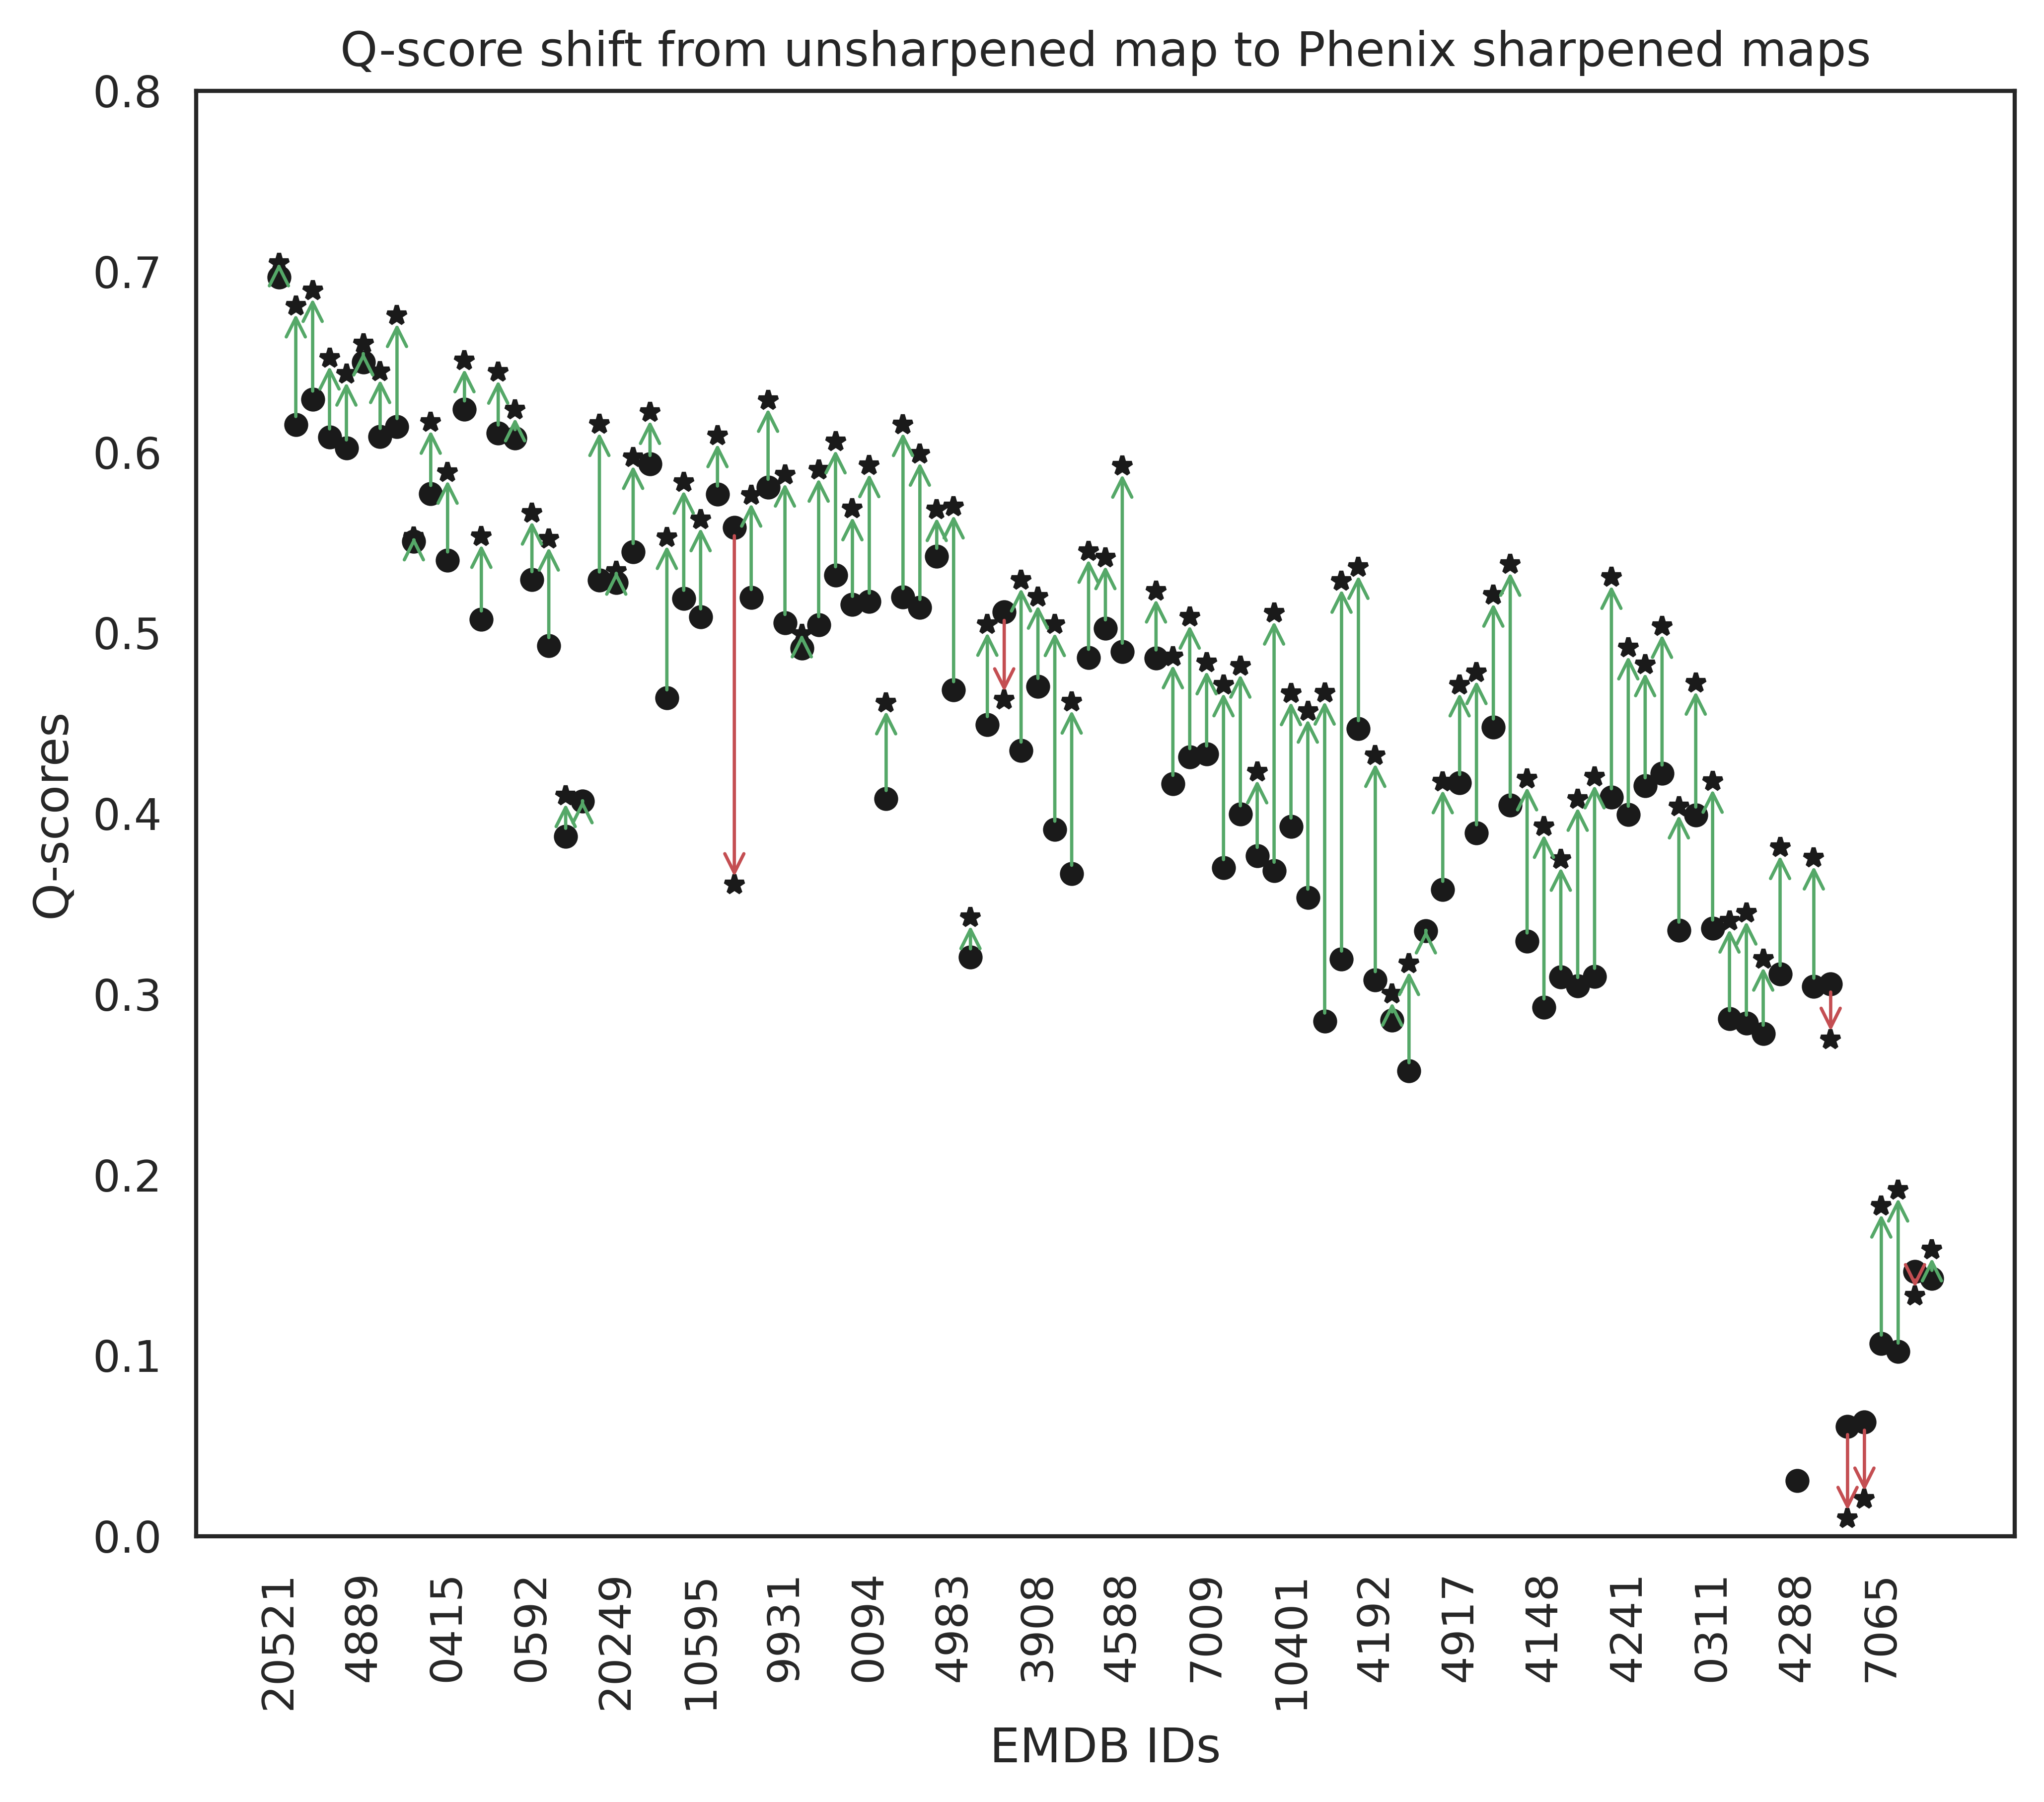

In [26]:
# plot a figure which shows the shifting of the unsharpened map to the sharpened maps for different EMDB IDs for phenix sharpened maps
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib 
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# set the global font size for the plot

fontsize = 14
fontscale = 1.2
figsize_cm = (20,16)
font = "Helvetica"    
plt.rcParams.update({'font.size': fontsize})
figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches

fig, ax = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
sns.set_theme(context="paper", font=font, font_scale=fontscale)
# Set font size for all text in the figure
sns.set_style("white")

ax.set_title("Q-score shift from unsharpened map to Phenix sharpened maps")
ax.set_xlabel("EMDB IDs")
ax.set_ylabel("Q-scores")

for emdb_pdb in unsharpened_to_phenix_shifting.keys():
    
    # X axis is the EMDB ID
    x = emdb_pdb.split('_')[0]
    y1 = unsharpened_to_phenix_shifting[emdb_pdb][0]
    y2 = unsharpened_to_phenix_shifting[emdb_pdb][1]
    ax.plot(x,y1,'ko')
    ax.plot(x,y2,'k*')
    # set X axis angle to 90 degrees
    plt.xticks(rotation=90)
    # if y1 < y2:
    #     ax.plot([x,x],[y1,y2],'g-')
    # else:
    #     ax.plot([x,x],[y1,y2],'r-')
    # add a arrow to the plot going from the unsharpened map to the sharpened map
    if y1 < y2:
        ax.annotate("", xy=(x, y2), xytext=(x, y1),arrowprops=dict(arrowstyle="->",color='g'))
    else:
        ax.annotate("", xy=(x, y2), xytext=(x, y1),arrowprops=dict(arrowstyle="->",color='r'))

plt.ylim(0,0.8)
emdb_id_xticks = [emdb_pdb.split('_')[0] for emdb_pdb in unsharpened_to_mbi_shifting.keys()]
xticks_spaced_out = [emdb_id_xticks[i] for i in range(0,len(emdb_id_xticks),5)]
# hide xticks
plt.xticks(xticks_spaced_out)
plt.savefig('Qscore_shift_from_unsharpened_to_sharpened_maps_phenix.eps',bbox_inches='tight')



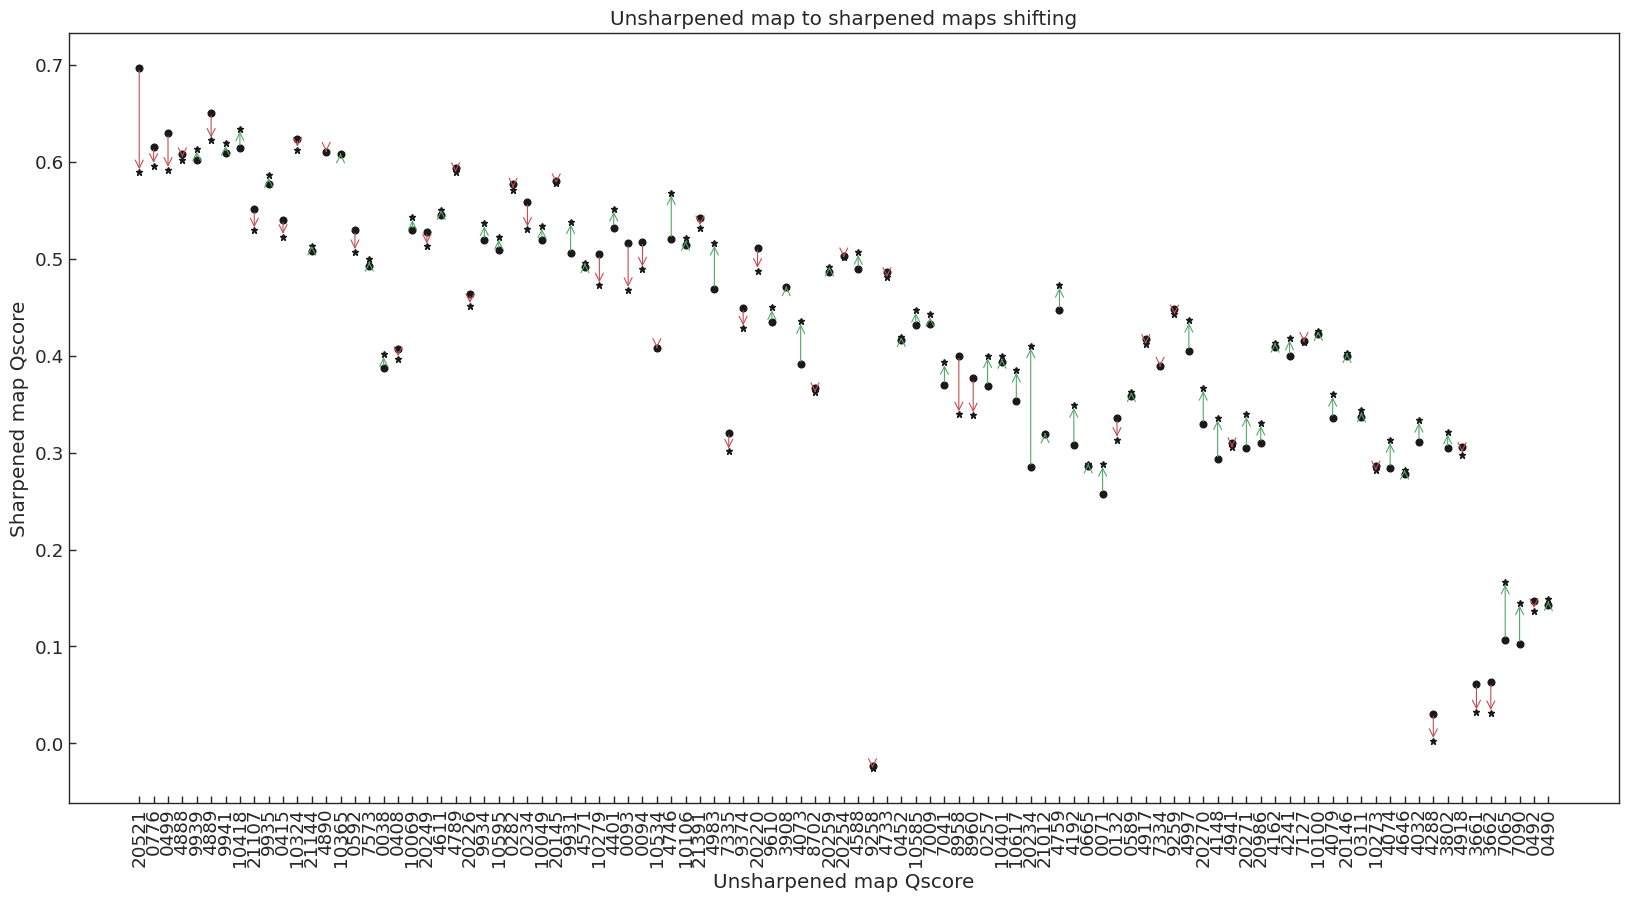

In [43]:
# plot a figure which shows the shifting of the unsharpened map to the sharpened maps for different EMDB IDs
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Unsharpened map to sharpened maps shifting")
ax.set_xlabel("Unsharpened map Qscore")
ax.set_ylabel("Sharpened map Qscore")

for emdb_pdb in unsharpened_to_mf_shifting.keys():
    
    # X axis is the EMDB ID
    x = emdb_pdb.split('_')[0]
    y1 = unsharpened_to_mf_shifting[emdb_pdb][0]
    y2 = unsharpened_to_mf_shifting[emdb_pdb][1]
    ax.plot(x,y1,'ko')
    ax.plot(x,y2,'k*')
    # set X axis angle to 90 degrees
    plt.xticks(rotation=90)
    # if y1 < y2:
    #     ax.plot([x,x],[y1,y2],'g-')
    # else:
    #     ax.plot([x,x],[y1,y2],'r-')
    # add a arrow to the plot going from the unsharpened map to the sharpened map
    if y1 < y2:
        ax.annotate("", xy=(x, y2), xytext=(x, y1),arrowprops=dict(arrowstyle="->",color='g'))
    else:
        ax.annotate("", xy=(x, y2), xytext=(x, y1),arrowprops=dict(arrowstyle="->",color='r'))




In [46]:
unsharpened_to_mf_shifting['20234_6p19']

(0.2850386632394686, 0.4102265095587022)

In [48]:


# number of EMDB IDs with unsharpened map Qscore > sharpened map Qscore
mf_efficacy = len([k for k in unsharpened_to_mf_shifting.keys() if unsharpened_to_mf_shifting[k][0] < unsharpened_to_mf_shifting[k][1]])
print("Number of EMDB IDs with unsharpened map Qscore > sharpened map Qscore: {}".format(mf_efficacy))

Number of EMDB IDs with unsharpened map Qscore > sharpened map Qscore: 56


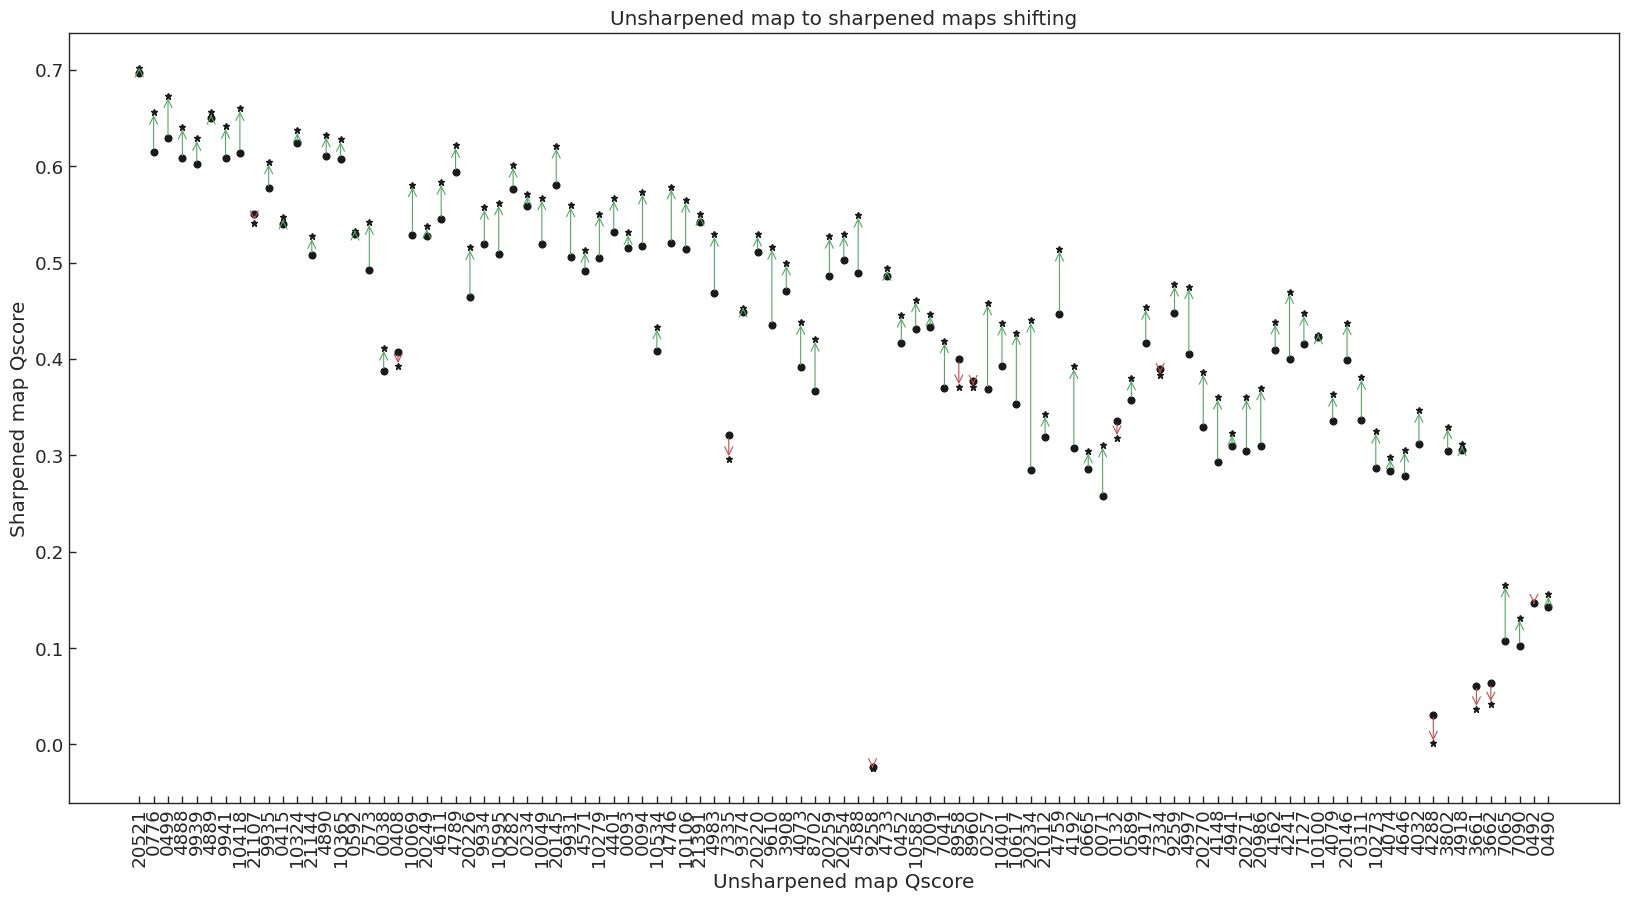

In [44]:
# plot a figure which shows the shifting of the unsharpened map to the sharpened maps for different EMDB IDs
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Unsharpened map to sharpened maps shifting")
ax.set_xlabel("Unsharpened map Qscore")
ax.set_ylabel("Sharpened map Qscore")

for emdb_pdb in unsharpened_to_mbi_shifting.keys():
    
    # X axis is the EMDB ID
    x = emdb_pdb.split('_')[0]
    y1 = unsharpened_to_mbi_shifting[emdb_pdb][0]
    y2 = unsharpened_to_mbi_shifting[emdb_pdb][1]
    ax.plot(x,y1,'ko')
    ax.plot(x,y2,'k*')
    # set X axis angle to 90 degrees
    plt.xticks(rotation=90)
    # if y1 < y2:
    #     ax.plot([x,x],[y1,y2],'g-')
    # else:
    #     ax.plot([x,x],[y1,y2],'r-')
    # add a arrow to the plot going from the unsharpened map to the sharpened map
    if y1 < y2:
        ax.annotate("", xy=(x, y2), xytext=(x, y1),arrowprops=dict(arrowstyle="->",color='g'))
    else:
        ax.annotate("", xy=(x, y2), xytext=(x, y1),arrowprops=dict(arrowstyle="->",color='r'))




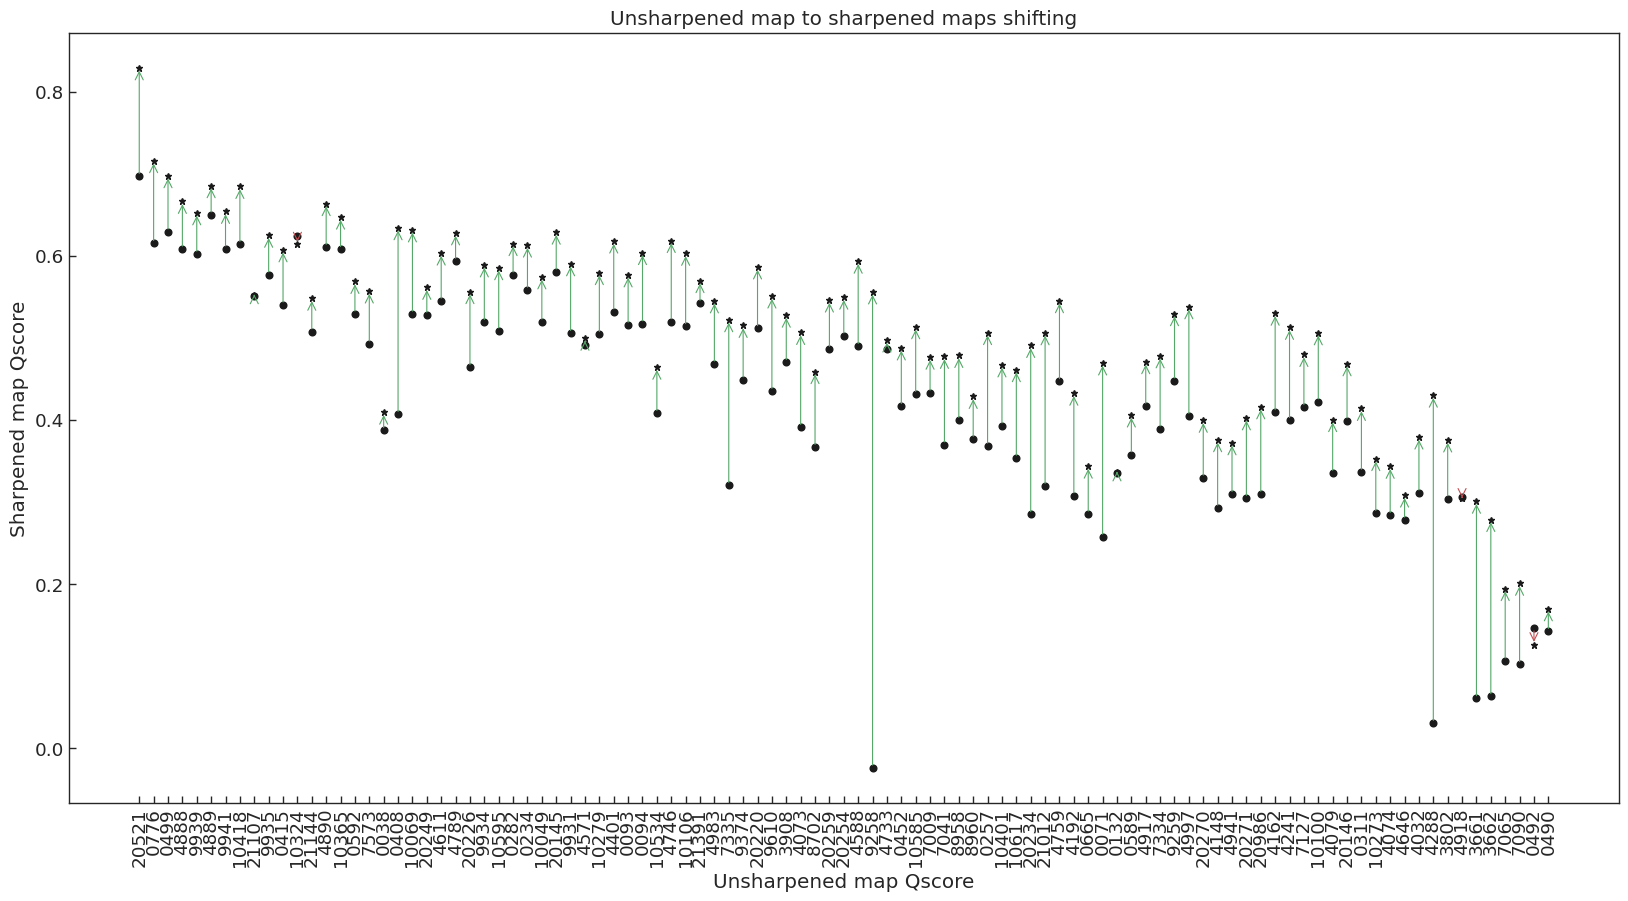

In [50]:
# plot a figure which shows the shifting of the unsharpened map to the sharpened maps for different EMDB IDs
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Unsharpened map to sharpened maps shifting")
ax.set_xlabel("Unsharpened map Qscore")
ax.set_ylabel("Sharpened map Qscore")

for emdb_pdb in unsharpened_to_phenix_shifting.keys():
    
    # X axis is the EMDB ID
    x = emdb_pdb.split('_')[0]
    y1 = unsharpened_to_deposited_shifting[emdb_pdb][0]
    y2 = unsharpened_to_deposited_shifting[emdb_pdb][1]
    ax.plot(x,y1,'ko')
    ax.plot(x,y2,'k*')
    # set X axis angle to 90 degrees
    plt.xticks(rotation=90)
    # if y1 < y2:
    #     ax.plot([x,x],[y1,y2],'g-')
    # else:
    #     ax.plot([x,x],[y1,y2],'r-')
    # add a arrow to the plot going from the unsharpened map to the sharpened map
    if y1 < y2:
        ax.annotate("", xy=(x, y2), xytext=(x, y1),arrowprops=dict(arrowstyle="->",color='g'))
    else:
        ax.annotate("", xy=(x, y2), xytext=(x, y1),arrowprops=dict(arrowstyle="->",color='r'))




Text(0.5, 1.0, 'Unsharpened Map Qscore vs Model Based Sharpened Map Qscore')

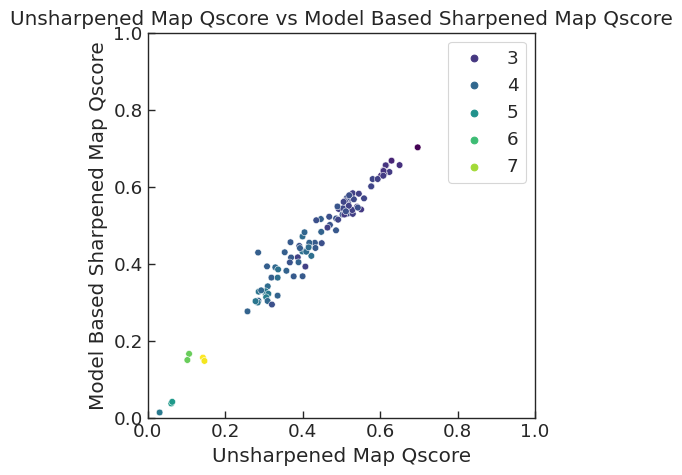

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the unsharpened map qscores versus model based sharpened map qscores with resolution as the color
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
sns.set_style({"xtick.major.size": 5, "ytick.major.size": 5})

fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x=unsharpened_qscores, y=MB_sharpened_qscores, hue=resolutions_list, palette="viridis", ax=ax)
ax.set_xlabel("Unsharpened Map Qscore")
ax.set_ylabel("Model Based Sharpened Map Qscore")
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.0)
ax.set_title("Unsharpened Map Qscore vs Model Based Sharpened Map Qscore")

